# Exploratory Data Analysis on Gun Deaths in the US [2006 - 2019]

## Importing Libraries

In [70]:
# Importing the pandas library and aliasing it as 'pd'
import pandas as pd

# Importing the os module, which provides a way of using operating system-dependent functionality
import os

# Importing the matplotlib.pyplot module and aliasing it as 'plt'
import matplotlib.pyplot as plt

## Merging the files into a single csv for Analysis

In [71]:
# Scanning the specified directory and creating a list of files using os.scandir()
files = [file for file in os.scandir("/Users/francischukwudi/Desktop/Portfolio Projects/Gun Deaths in the US")]

# Iterating over each file in the list
for file in files:
    print(file)  # Printing the file

<DirEntry 'guns_2014.csv'>
<DirEntry 'guns_2015.csv'>
<DirEntry 'guns_2017.csv'>
<DirEntry 'guns_2016.csv'>
<DirEntry 'guns_2012.csv'>
<DirEntry 'guns_2006.csv'>
<DirEntry 'guns_2007.csv'>
<DirEntry 'guns_2013.csv'>
<DirEntry 'guns_2011.csv'>
<DirEntry 'guns_2010.csv'>
<DirEntry 'guns_2009.csv'>
<DirEntry 'guns_2008.csv'>
<DirEntry 'guns_2020.csv'>
<DirEntry 'guns_2018.csv'>
<DirEntry 'guns_2019.csv'>


In [72]:
# Specifying the directory path
directory = "/Users/francischukwudi/Desktop/Portfolio Projects/Gun Deaths in the US"

# Creating a list of file names in the directory using os.scandir()
files = [file.name for file in os.scandir(directory)]

# Creating an empty DataFrame to store the combined data
all_gun_deaths_data = pd.DataFrame()

# Iterating over each file in the directory
for file in files:
    # Reading each CSV file using pd.read_csv() and joining the file path with the directory path
    df = pd.read_csv(os.path.join(directory, file))
    
    # Concatenating the current file's data with the existing data in all_gun_deaths_data
    all_gun_deaths_data = pd.concat([all_gun_deaths_data, df])

# Saving the combined data to a new CSV file named "all_gun_deaths_data.csv" without including the index
all_gun_deaths_data.to_csv("all_gun_deaths_data.csv", index=False)

In [73]:
all_gun_deaths_data.tail() #printing the last 5 rows of the dataframe

,year,month,intent,police,sex,age,race,hispanic,place,education
39702,2019,12,Homicide,0,M,16.0,White,100,Street,Less than HS
39703,2019,12,Homicide,0,M,45.0,Black,100,Street,Less than HS
39704,2019,12,Homicide,0,M,24.0,Black,100,Street,HS/GED
39705,2019,12,Homicide,0,M,33.0,Black,100,Home,HS/GED
39706,2019,12,Homicide,0,M,24.0,Black,100,Street,Less than HS


In [74]:
# Assigning the DataFrame 'all_gun_deaths_data' to the variable 'data
data = all_gun_deaths_data
data.shape #this displays the number of rows and columns the dataframe contains

(529233, 10)

In [75]:
data.describe()#displays a statistical summary of the data contained in the dataframe

,year,month,police,age,hispanic
count,529233.000000,529233.000000,529233.000000,529156.000000,529233.000000
mean,2013.480724,6.569454,0.012824,42.918429,115.337774
std,4.359197,3.400949,0.112516,19.485696,61.992719
min,2006.000000,1.000000,0.000000,0.000000,100.000000
25%,2010.000000,4.000000,0.000000,26.000000,100.000000
50%,2014.000000,7.000000,0.000000,40.000000,100.000000
75%,2017.000000,9.000000,0.000000,57.000000,100.000000
max,2020.000000,12.000000,1.000000,109.000000,998.000000


In [76]:
#Retrieving data types contained in the columns
data.dtypes

year           int64
month          int64
intent        object
police         int64
sex           object
age          float64
race          object
hispanic       int64
place         object
education     object
dtype: object

In [77]:
#This checks for missing values in the dataframe
null_values = data.isnull().sum()
null_values

year             0
month            0
intent          27
police           0
sex              0
age             77
race             0
hispanic         0
place         6660
education    13208
dtype: int64

In [78]:
#This drops all missing values in the dataframe
data = data.dropna()

In [79]:
#This is to confirm that there are no missing values in the data frame
null_values = data.isnull().sum()
null_values

year         0
month        0
intent       0
police       0
sex          0
age          0
race         0
hispanic     0
place        0
education    0
dtype: int64

In [80]:
#This investigates the unique values in the intent column
data['intent'].unique()

array(['Suicide', 'Homicide', 'Accidental', 'Undetermined'], dtype=object)

## Investigating the most common intent associated with gun deaths

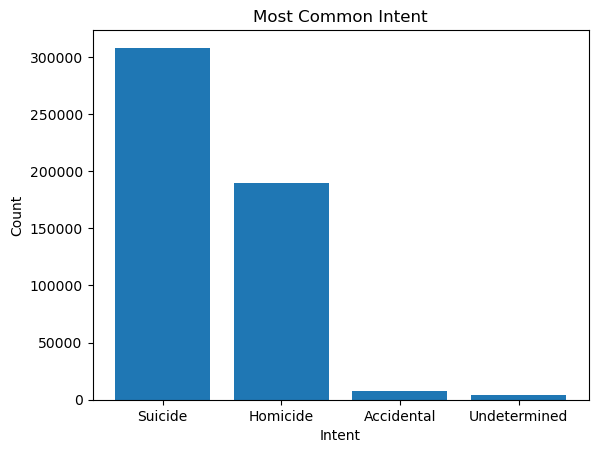

In [81]:
# Count the occurrences of each intent
intent_counts = data['intent'].value_counts()

# Plot the bar chart for intent counts
plt.bar(intent_counts.index, intent_counts.values)
plt.xlabel('Intent')
plt.ylabel('Count')
plt.title('Most Common Intent')
plt.show()

From the visualization above, suicide is the most common intent associated with gun deaths in the US.

## Investigating the trend of gun deaths by year

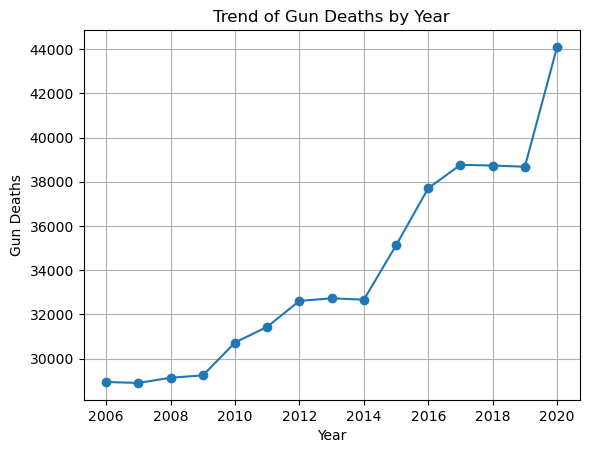

In [82]:
# Group the data by year and count the gun deaths
gun_deaths_by_year = data.groupby('year').size()

# Plot the line chart for gun deaths by year
plt.plot(gun_deaths_by_year.index, gun_deaths_by_year.values, marker='o')
plt.grid()  # Display a grid on the plot
plt.xlabel('Year')  # Set the label for the x-axis
plt.ylabel('Gun Deaths')  # Set the label for the y-axis
plt.title('Trend of Gun Deaths by Year')  # Set the title of the plot
plt.show()  # Display the plot


The visualization shows a gradual increase in gun deaths over the years which is a disturbing trend and requires further investigation.

## Investigating the most affected Race 

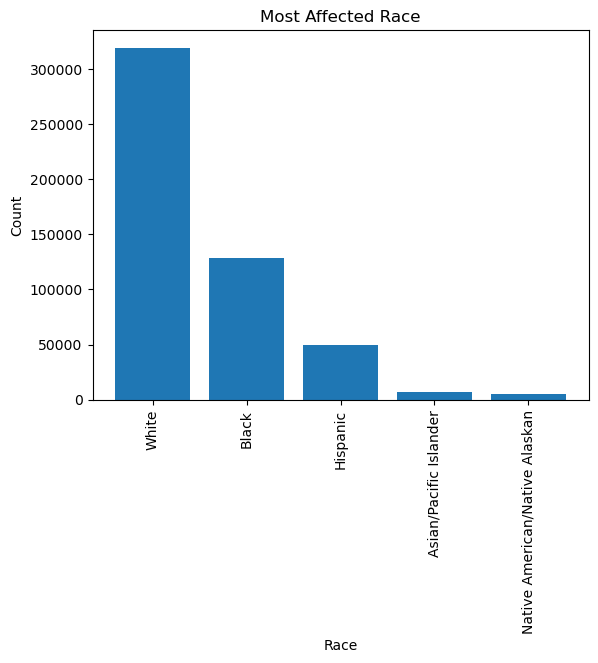

In [83]:
# Count the occurrences of each race
race_counts = data['race'].value_counts()

# Plot the bar chart for race counts
plt.bar(race_counts.index, race_counts.values)
plt.xticks(rotation='vertical')  # Rotate the x-axis tick labels vertically for better readability
plt.xlabel('Race')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.title('Most Affected Race')  # Set the title of the plot
plt.show()  # Display the plot

The most affected race is the White race, this could be further investigated to understand why.

## Investigating the race with the highest homicide rate

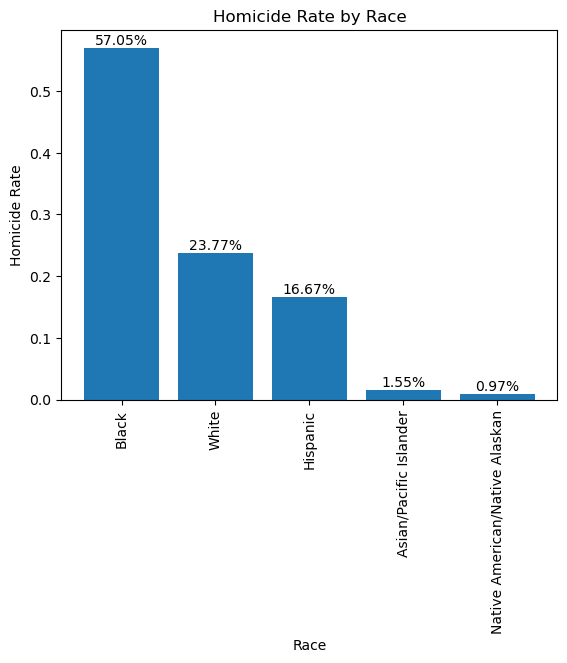

Race with the highest homicide rate: Black


In [84]:
# Calculate the homicide rate for each race
race_homicide_rates = data[data['intent'] == 'Homicide']['race'].value_counts(normalize=True)

# Find the race with the highest homicide rate
highest_homicide_race = race_homicide_rates.idxmax()

# Plot the bar chart for homicide rates by race
plt.bar(race_homicide_rates.index, race_homicide_rates.values)
plt.xticks(rotation='vertical')  # Rotate the x-axis tick labels vertically for better readability
plt.xlabel('Race')  # Set the label for the x-axis
plt.ylabel('Homicide Rate')  # Set the label for the y-axis
plt.title('Homicide Rate by Race')  # Set the title of the plot

# Add text annotations to the bars
for i, rate in enumerate(race_homicide_rates.values):
    plt.text(i, rate, f"{rate:.2%}", ha='center', va='bottom')

plt.show()  # Display the plot

# Print the race with the highest homicide rate
print("Race with the highest homicide rate:", highest_homicide_race)


Further investigation could be carried out on the reason for homicidal deaths among blacks

## Investigating the race with the highest suicide rate

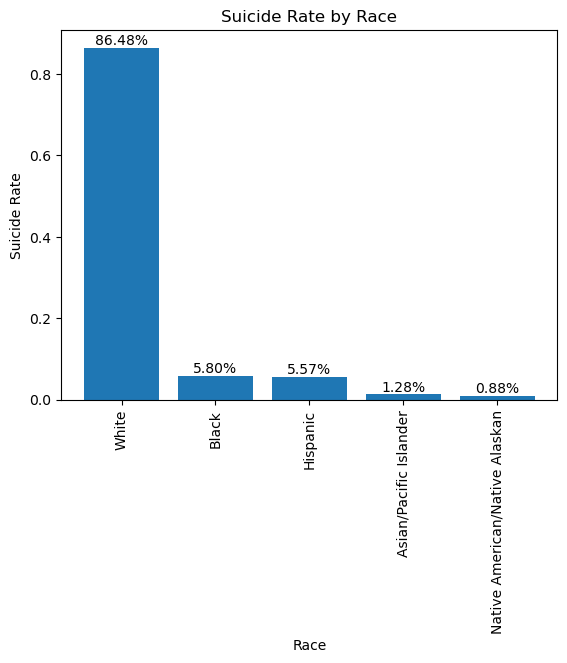

Race with the highest suicide rate: White


In [85]:
# Calculate the suicide rate for each race
race_suicide_rates = data[data['intent'] == 'Suicide']['race'].value_counts(normalize=True)

# Find the race with the highest suicide rate
highest_suicide_race = race_suicide_rates.idxmax()

# Plot the bar chart for suicide rates by race
plt.bar(race_suicide_rates.index, race_suicide_rates.values)
plt.xticks(rotation='vertical')
plt.xlabel('Race')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate by Race')

# Add text annotations to the bars
for i, rate in enumerate(race_suicide_rates.values):
    plt.text(i, rate, f"{rate:.2%}", ha='center', va='bottom')

plt.show()

# Print the race with the highest suicide rate
print("Race with the highest suicide rate:", highest_suicide_race)

## Investigating the likelihood of a gun death by month

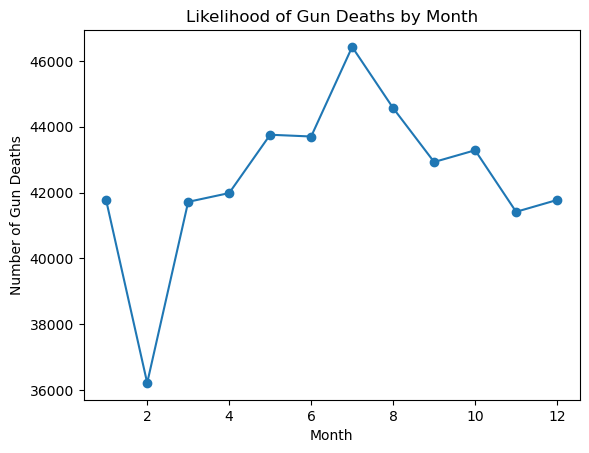

Month with the highest gun deaths: 7


In [86]:
# Calculate the frequency of gun deaths by month
gun_deaths_by_month = data['month'].value_counts()

# Sort the months in ascending order
gun_deaths_by_month = gun_deaths_by_month.sort_index()

# Find the month with the highest gun death 
highest_gundeath_month = gun_deaths_by_month.idxmax()

# Plot the bar chart for likelihood of gun deaths by month
plt.plot(gun_deaths_by_month.index, gun_deaths_by_month.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Gun Deaths')
plt.title('Likelihood of Gun Deaths by Month')
plt.show()

# Print the month with the highest gun deaths
print("Month with the highest gun deaths:", highest_gundeath_month)

The visualization shows that the month with the most gun deaths is the 7th month which is July, this could help inform efforts in curbing this escalation and further analysis could be carried out to investigate reasons behind the spike in such months.

## Investigating the likelihood of a suicide by age group

The age group with the highest number of suicides is: (50, 60]


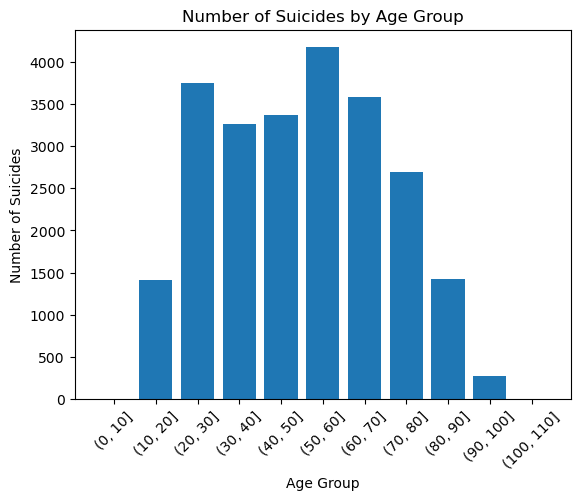

In [87]:
age_groups = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]  # Define the age groups

# Filter the dataframe to include only rows where the intent is 'Suicide'
suicide_data = df[df['intent'] == 'Suicide']

# Group the data by age groups and calculate the count of suicides
suicide_by_age = suicide_data.groupby(pd.cut(suicide_data['age'], age_groups)).size()

# Find the age group with the highest number of suicides
most_suicides_age_group = suicide_by_age.idxmax()
print("The age group with the highest number of suicides is:", most_suicides_age_group)

# Plot the number of suicides by age group
plt.bar(suicide_by_age.index.astype(str), suicide_by_age.values)
plt.xlabel('Age Group')
plt.ylabel('Number of Suicides')
plt.title('Number of Suicides by Age Group')
plt.xticks(rotation=45)
plt.show()

This information would inform efforts in ensuring mental health efforts/ awareness programs targeting such age groups with the aim of reducing the suicide rates.

## Investigating the likelihood of a homicide by age group

The age group with the highest number of homicides is: (20, 30]


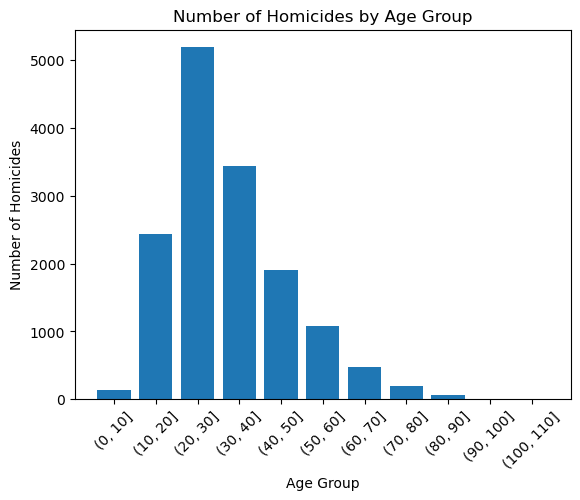

In [88]:
age_groups = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]  # Define the age groups

# Filter the dataframe to include only rows where the intent is 'Homicide'
homicide_data = df[df['intent'] == 'Homicide']

# Group the data by age groups and calculate the count of homicides
homicide_by_age = homicide_data.groupby(pd.cut(homicide_data['age'], age_groups)).size()

# Find the age group with the highest number of homicides
most_homicides_age_group = homicide_by_age.idxmax()
print("The age group with the highest number of homicides is:", most_homicides_age_group)

# Plot the number of homicides by age group
plt.bar(homicide_by_age.index.astype(str), homicide_by_age.values)
plt.xlabel('Age Group')
plt.ylabel('Number of Homicides')
plt.title('Number of Homicides by Age Group')
plt.xticks(rotation=45)
plt.show()

With this information efforts could be made to curb homicides in such age groups by increasing awareness and hopefully reduce gun distribution to that effect

## Investigating the frequency of gun deaths by place

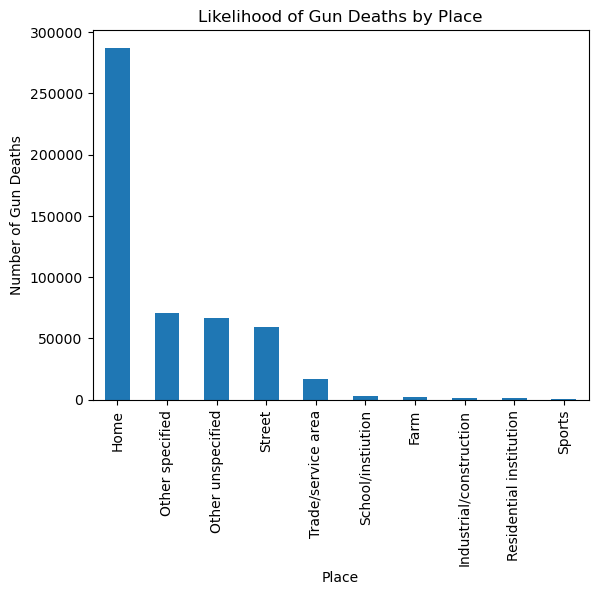

In [89]:
# Calculate the frequency of gun deaths by place
gun_deaths_by_place = data['place'].value_counts()

# Sort the places by frequency in descending order
gun_deaths_by_place = gun_deaths_by_place.sort_values(ascending=False)

# Plot the bar chart for likelihood of gun deaths by place
gun_deaths_by_place.plot(kind='bar')
plt.xlabel('Place')
plt.ylabel('Number of Gun Deaths')
plt.title('Likelihood of Gun Deaths by Place')
plt.show()

The analysis shows that the place with the highest gun deaths is the home, raising a lot of questions and leading to the next analysis which is what intent is mostly associated with gun deaths at home.

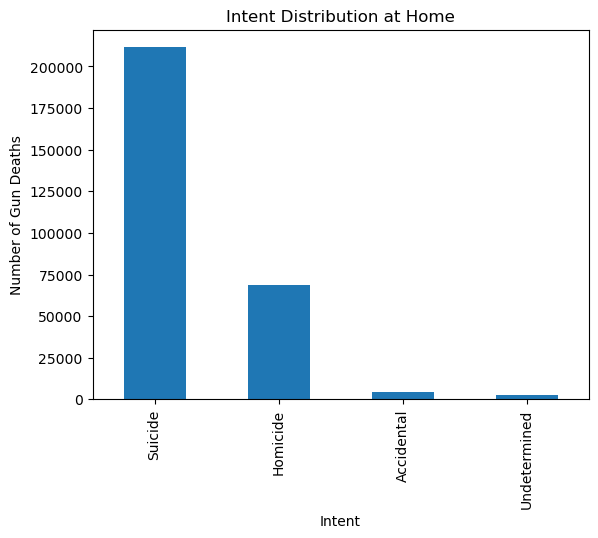

In [90]:
# Filter the data for rows where place is 'Home'
home_data = data[data['place'] == 'Home']

# Calculate the distribution of intents at home
intent_distribution_at_home = home_data['intent'].value_counts()

# Plot the bar chart for intent distribution at home
intent_distribution_at_home.plot(kind='bar')
plt.xlabel('Intent')
plt.ylabel('Number of Gun Deaths')
plt.title('Intent Distribution at Home')
plt.show()

This analysis shows that most intents associated with the home are suicides. 

## Investigating intent distribution on the street

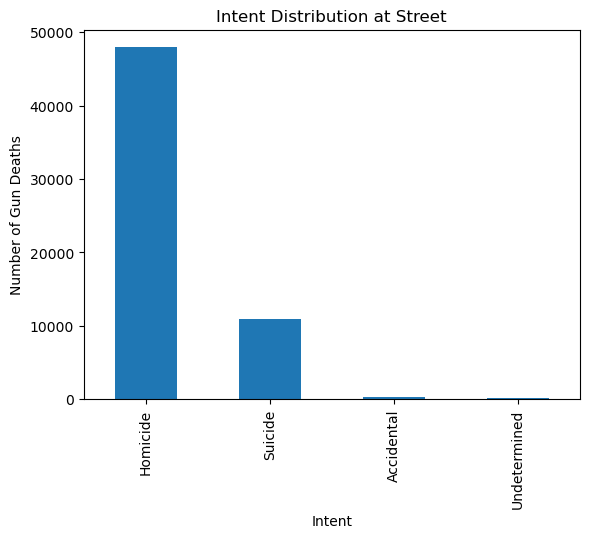

In [91]:
# Filter the data for rows where place is 'Street'
street_data = data[data['place'] == 'Street']

# Calculate the distribution of intents at street
intent_distribution_at_street = street_data['intent'].value_counts()

# Plot the bar chart for intent distribution at home
intent_distribution_at_street.plot(kind='bar')
plt.xlabel('Intent')
plt.ylabel('Number of Gun Deaths')
plt.title('Intent Distribution at Street')
plt.show()

This shows that homicides are the highest intents for gun deaths on the street

## Intent distribution at Train/Service Areas

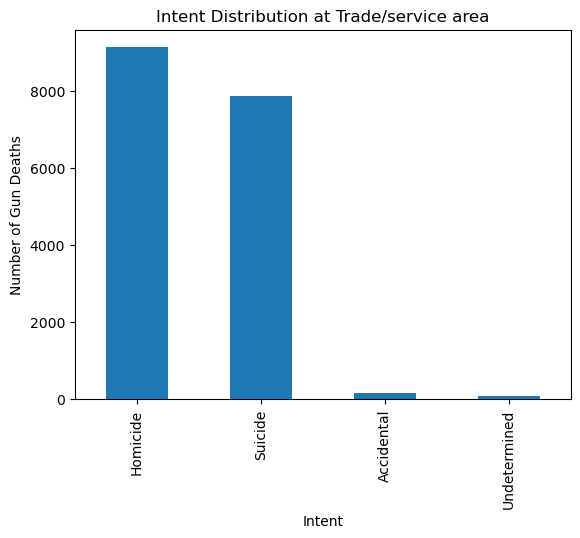

In [92]:
# Filter the data for rows where place is 'Trade/service area'
Trade_servicearea_data = data[data['place'] == 'Trade/service area']

# Calculate the distribution of intents at Trade/service area
intent_distribution_at_trade = Trade_servicearea_data['intent'].value_counts()

# Plot the bar chart for intent distribution at Trade/service area
intent_distribution_at_trade.plot(kind='bar')
plt.xlabel('Intent')
plt.ylabel('Number of Gun Deaths')
plt.title('Intent Distribution at Trade/service area')
plt.show()

### Comparing Suicides amongst males and females

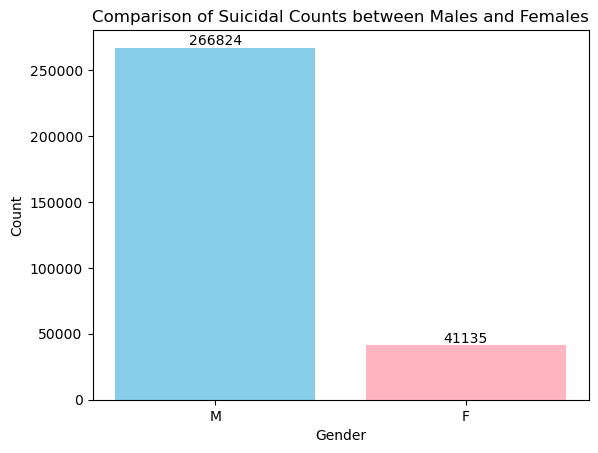

In [93]:
suicide_data = data[data['intent'] == 'Suicide']
gender_counts = suicide_data['sex'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'lightpink'])

# Add data labels to the bars
for i, v in enumerate(gender_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Comparison of Suicidal Counts between Males and Females')
plt.show()

The visualization shows that an alarming number of males i.e ~5* the number of females resort to suicides by gun. This information could help inform efforts in mental health awareness among males to prevent such trends. 

/var/folders/vp/f_n8tq4909j79_t25zywb_9r0000gn/T/ipykernel_83269/297285933.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)


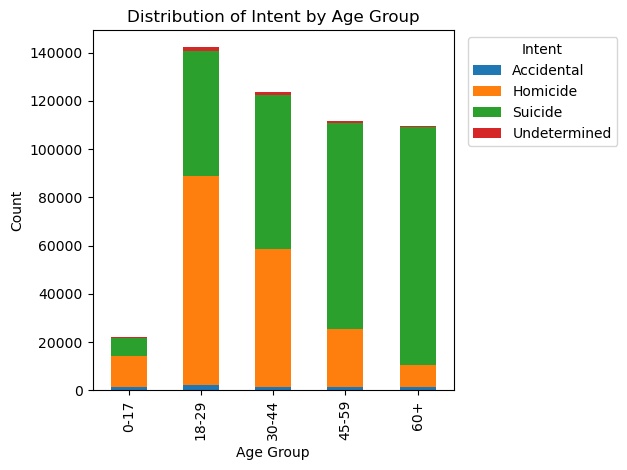

Age Group 0-17: Accidental - 1283, Homicide - 12874, Suicide - 7709, Undetermined - 431
Age Group 18-29: Accidental - 2249, Homicide - 86436, Suicide - 52080, Undetermined - 1358
Age Group 30-44: Accidental - 1538, Homicide - 56938, Suicide - 64150, Undetermined - 940
Age Group 45-59: Accidental - 1526, Homicide - 24077, Suicide - 85390, Undetermined - 840
Age Group 60+: Accidental - 1301, Homicide - 9159, Suicide - 98630, Undetermined - 630


In [94]:
# Define age groups
age_bins = [0, 18, 30, 45, 60, 120]
age_labels = ['0-17', '18-29', '30-44', '45-59', '60+']

# Categorize the data into age groups
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)

# Count the intents within each age group
intent_counts = data.groupby('age_group')['intent'].value_counts().unstack().fillna(0)

# Create a stacked bar plot to visualize the distribution of intent by age group
ax = intent_counts.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Intent by Age Group')
plt.legend(title='Intent', bbox_to_anchor=(1.02, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

# Print the values for each age-group intent
for age_group in intent_counts.index:
    intent_values = intent_counts.loc[age_group]
    statement = f"Age Group {age_group}: "
    for intent, value in intent_values.items():
        statement += f"{intent} - {int(value)}, "
    statement = statement.rstrip(", ")
    print(statement)


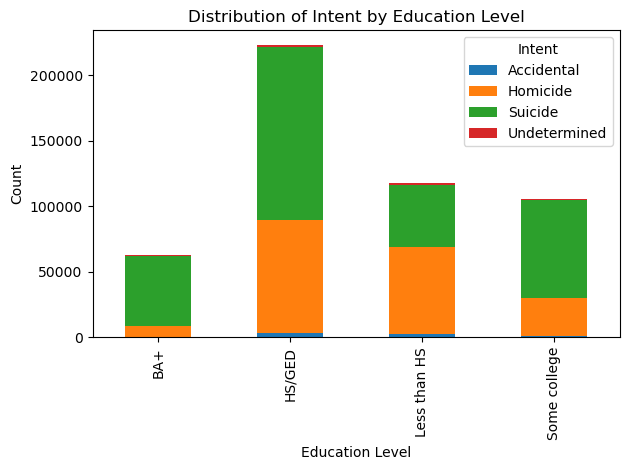

Education Level: BA+
Accidental - 646
Homicide - 8040
Suicide - 53683
Undetermined - 379

Education Level: HS/GED
Accidental - 3107
Homicide - 86707
Suicide - 131636
Undetermined - 1787

Education Level: Less than HS
Accidental - 2755
Homicide - 66282
Suicide - 47362
Undetermined - 1182

Education Level: Some college
Accidental - 1389
Homicide - 28455
Suicide - 75278
Undetermined - 851



In [95]:
# Count the intents within each education level
intent_counts = data['intent'].groupby(data['education']).value_counts().unstack().fillna(0)

# Create a stacked bar plot to visualize the distribution of intent by education
ax = intent_counts.plot(kind='bar', stacked=True)


# Customize the plot
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Intent by Education Level')
plt.legend(title='Intent')

# Show the plot
plt.tight_layout()
plt.show()


for education_level in intent_counts.index:
    intent_values = intent_counts.loc[education_level]
    statement = f"Education Level: {education_level}\n"
    for intent, value in intent_values.items():
        statement += f"{intent} - {int(value)}\n"
    print(statement)